In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx

Growing Watts-Strogatz graph

In [3]:
N = 100
M = 5
mu = 0.1

np.random.seed(42)

G = nx.Graph()

for n in range(N):
    G.add_node(n)

active_nodes = set()

for i in range(M):
    active_nodes.add(i)
    for j in range(M):
        active_nodes.add(j)
        if i!=j:
            G.add_edge(i, j)
            
for i in list(range(M, N)) + list(range(0, M)):
    for n in active_nodes:
        if np.random.rand() > mu:
            G.add_edge(i, n)
        else:
            j = i
            while j == i or j in active_nodes:
                j = np.random.choice(N)
            G.add_edge(i, j)
    
    j = np.random.choice(list(active_nodes))
    active_nodes.remove(j)
    active_nodes.add(i)

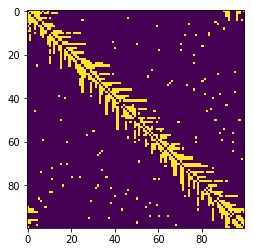

In [4]:
A = nx.to_numpy_matrix(G)
plt.imshow(A)

/home/panisson/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


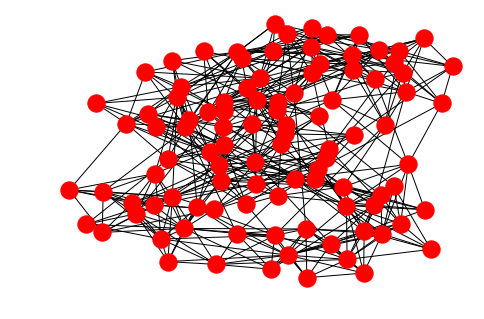

In [5]:
nx.draw_spring(G)

In [6]:
nx.average_clustering(G)

0.4783706473265296

In [7]:
nx.average_clustering(nx.erdos_renyi_graph(N, 0.1))

0.09721907091876127

In [8]:
nx.average_clustering(nx.barabasi_albert_graph(N, M))

0.18942375274817724

In [9]:
Gws = nx.watts_strogatz_graph(N, M*2, 0.1)
print(nx.average_clustering(Gws))
print(Gws.number_of_edges())

0.47591702741702735
500


Growing Watts-Strogatz graph with preferential attachment (Klemm and Eguíluz)

In [10]:
N = 2000
M = 2
mu = 0.1

np.random.seed(42)

G = nx.Graph()

for n in range(N):
    G.add_node(n)

active_nodes = set()

for i in range(M):
    active_nodes.add(i)
    for j in range(M):
        active_nodes.add(j)
        if i!=j:
            G.add_edge(i, j)
            
for i in list(range(M, N)) + list(range(0, M)):
    for n in active_nodes:
        if np.random.rand() > mu:
            G.add_edge(i, n)
        else:
            j = i
            while j == i or j in active_nodes:
                degrees = G.degree()
                degree_seq = np.array([d[1] for d in degrees])
                attachment_prob = degree_seq/degree_seq.sum()
                j = np.random.multinomial(1, attachment_prob).argmax()
            G.add_edge(i, j)
    
    j = np.random.choice(list(active_nodes))
    active_nodes.remove(j)
    active_nodes.add(i)

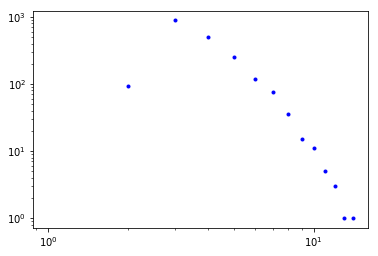

In [11]:
plot(nx.degree_histogram(G), 'b.')
plt.loglog();

In [12]:
nx.average_clustering(G)

0.3982840659340642

In [13]:
nx.average_clustering(nx.erdos_renyi_graph(N, 0.1))

0.09994581188649078

In [14]:
nx.average_clustering(nx.barabasi_albert_graph(N, M))

0.011020920813916067

In [15]:
Gws = nx.watts_strogatz_graph(N, M*2, 0.1)
print(nx.average_clustering(Gws))
print(Gws.number_of_edges())

0.3616666666666674
4000


In [16]:
print(nx.average_clustering(G))
print(G.number_of_edges())

0.3982840659340642
4000
